## A01 - Regresión polinomial

Para los datos de los archivos "bateria_tableta.txt" y "Salarios_minimos.csv":

- Realiza regresiones polinomiales de orden 1, 3, 5 y 7.

- Compara el R2 que te da cada modelo.

- Crea una gráfica con una nube de dispersión (datos originales) y tus modelos.

Separa adecuadamente con Markdown.

|                |   |
:----------------|---|
| **Nombre**     |Christopher Jacob Ahumada Robles   |
| **Fecha**      |21/01/2025   |
| **Expediente*.*           748077|   |

1.-Leer archivo
2.- ¿Que es x?
3.- ¿Que es y?
4.- ¿Cuales son mis factores?
5.- Crear Factores 
6.- Fit

In [138]:
import pandas as pd
import numpy as np
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [140]:
df1=pd.read_csv("Salarios_minimos.csv")
df2=pd.read_csv("bateria_tableta.txt")

## Act 1 Regresion Carga de bateria

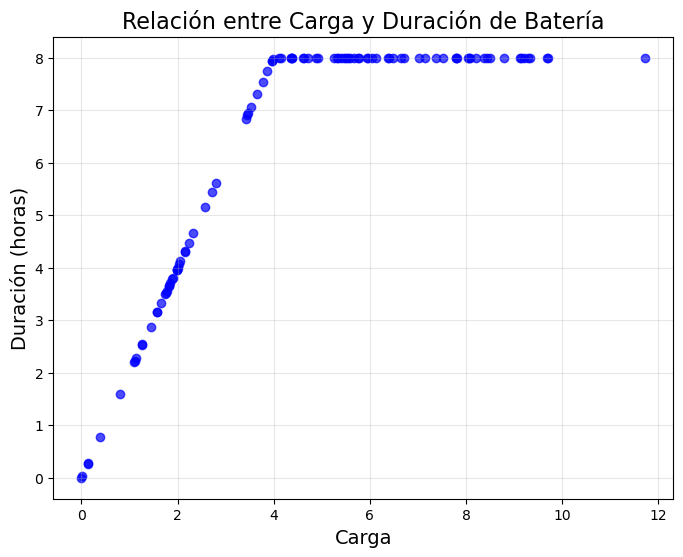

In [143]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.figure(figsize=(8, 6))
plt.scatter(df2['carga'], df2['duracion'], color='blue', alpha=0.7)
plt.title('Relación entre Carga y Duración de Batería', fontsize=16)
plt.xlabel('Carga', fontsize=14)
plt.ylabel('Duración (horas)', fontsize=14)
plt.grid(alpha=0.3)
plt.show()

In [145]:
x=df2["carga"]
y=df2["duracion"]
s=np.reshape(x,[len(x),1])
q=np.reshape(y,[len(y),1])
from sklearn.linear_model import LinearRegression 

In [147]:
reg=LinearRegression()
reg.fit(s,q)
reg.intercept_,reg.coef_

(array([2.87054111]), array([[0.72955585]]))

In [149]:
y_pred = reg.predict(s)
rss=np.sum((y_pred - q)**2)
tss=np.sum((q - q.mean())**2)
r2=(tss-rss)/tss
r2,tss,reg.score(s,q)


(0.6872269726243967, 596.2457760000001, 0.6872269726243967)

### Ahora mejoramos el accuracy transformando datos

In [152]:
df2[df2["carga"] <= 4].max()

carga       3.99
duracion    7.98
dtype: float64

In [192]:
def regresion_polinomial(df, x_col, y_col, grado):

    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values
    
    resultados = {}
    
    for g in range(1, grado + 1):
        X = np.hstack([x**i for i in range(1, g + 1)])
        model = LinearRegression()
        model.fit(X, y)
        r2 = model.score(X, y)
        resultados[g] = {
            'R2': r2
        }
    resultados=pd.DataFrame(resultados)
    x_test = np.reshape(np.linspace(0, 100), [-1, 1])
    for g in range(1, grado + 1):
        X_test = np.hstack([x_test**i for i in range(1, g + 1)])
        y_pred = model.predict(X_test)
    



      

    return resultados

regresion_polinomial(df2, "carga", "duracion", 2)


ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

In [210]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

def regresion_polinomial(df, x_col, y_col, grado):
    x = df[x_col].values.reshape(-1, 1)
    y = df[y_col].values

    resultados = {}
    
    plt.figure(figsize=(10, 6))
    
    for g in range(1, grado + 1):
        poly = PolynomialFeatures(degree=g)
        X_poly = poly.fit_transform(x)
        
        # Ajustar modelo
        model = LinearRegression()
        model.fit(X_poly, y)
        r2 = model.score(X_poly, y)
        
        # Guardar resultados
        resultados[g] = {'R2': r2}
        
        # Predicciones para graficar
        y_pred = pd.DataFrame(model.predict(X_poly))

    # Convertir resultados a DataFrame
    resultados_df = pd.DataFrame(resultados).T
    resultados_df.index.name = 'Grado'
       
    return resultados_df

# Llamada a la función
regresion_polinomial(df2, "carga", "duracion", 3)


,R2
Grado,
1,0.687227
2,0.954889
3,0.978067


## Act 2 regresiones Salario

In [212]:
df1.head()

,Periodo,Salario
0,1988.25,8.00
1,1989.00,8.64
2,1989.50,9.16
3,1990.00,10.08
4,1990.84,11.90


In [214]:
regresion_polinomial(df1, "Periodo", "Salario", 4)

,R2
Grado,
1,0.984457
2,0.985486
3,0.985737
4,0.985746
